# Kickstarter Success Project
Course: CST338

Students: Jeff Burk, Aisha Lalli, Michelle Phung, Hugo Rodriguez

Instructor: Professor Memo

### Introduction
Many entrepreneurs or small businesses turn to the Kickstarter platform as a means to fund their project. Significant time and effort can be put into creating a Kickstarter campaign, but if the funding goal is not reached then the project will not be funded, and could prove to have been a waste of resources. A number of factors can contribute to the success or failure of a Kickstarter campaign. Our goal is to create a model to predict the pledged dollar amount for a given campaign based on the dataset of over 300k completed campaigns, helping users decide whether to start a Kickstarter campaign or to pursue more traditional means of funding such as a bank loan or raising money from investors. Features used to predict the pledged amount include funding goal, main category, sub-category, length of campaign in days, and number of backers, and project state.

### Dataset
Link to the dataset

https://www.kaggle.com/kemical/kickstarter-projects

This dataset was collected from the Kickstarter platform. The dataset contains info on over 300K kickstarter projects from the company’s launch in 2009 through 2017. Some features of the dataset include category, sub-category, project name, currency, country, funding goal, funding pledged, number of backers, project state, and more. The dataset includes 15 columns of which 7 are numeric values, and over 300k rows. The data was collected by a crowdfunding and data science enthusiast, Mickaël Mouillé, in 2018 and uploaded to Kaggle, an online community of data science enthusiasts. The dataset is currently available for download in Excel CSV format.


Module imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

### Read the data and take a look at it

In [3]:
infile = 'https://github.com/jb01010/cst383/raw/main/ks-projects-201801.zip'
df = pd.read_csv(infile)

  Basic information of dataset

In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


View the first 5 rows of the dataset

In [6]:
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Missing Data

Checking columns for nan values and calculating percentage

In [7]:
df.isna().any()
percent_missing = df.isna().sum() * 100 / len(df)
pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

,column_name,percent_missing
ID,ID,0.000000
name,name,0.001056
category,category,0.000000
main_category,main_category,0.000000
currency,currency,0.000000
deadline,deadline,0.000000
goal,goal,0.000000
launched,launched,0.000000
pledged,pledged,0.000000
state,state,0.000000


A small percentage of the 'name' and  'usd_pledged' columns contain missing or NAN values
These rows can be dropped

In [8]:
df.dropna(inplace=True)

### Preprocessing the data

Checking for duplicate project ID values, none found

In [9]:
print(f"{len(df[df.duplicated(subset='ID')])} Duplicate Project ID numbers")

0 Duplicate Project ID numbers


Dropping the project 'ID' column 

In [10]:
df.drop(columns='ID', inplace=True)

Checking the counts of campaign status

In [11]:
df.state.value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

Live, cancelled, suspended, and undefined campaigns can be dropped from the dataset

In [12]:
df = df[(df['state'] == 'successful') | (df['state'] == 'failed')]

Displaying the updated value counts

In [13]:
df.state.value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

Converting the launched and deadline dates to a timedate format column for exploration and processing

In [14]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

Replacing column names that contain spaces for exploration and processing

In [15]:
df.columns = [c.replace(' ', '_') for c in df.columns]

Finding data correlations of numeric columns with heatmap

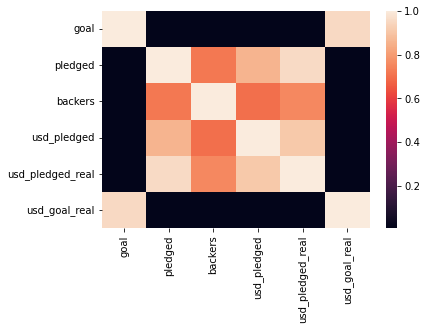

In [16]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns);

The colunms 'usd_goal_real' and 'usd_pledged_real' were added by the data collector
to account for current currency conversion rates. These columns are highly correlated
to 'goal' and 'usd_pledged' and can be dropped.

In [17]:
df.drop(columns=['usd_goal_real', 'usd_pledged_real'], inplace=True)

Similiarly 'usd_pledged' is highly correlated to 'pledged' and can be dropped

In [18]:
df.drop(columns='usd_pledged', inplace=True)

The 'currency' column can also be dropped as we have the 'usd_pledged' values

In [19]:
df.drop(columns='currency', inplace=True)

Of the remaining numeric columns, The 'goal' column appears uncorrelated to 'backers' or 'pledged'
The number of backers has about a 75% correlation to the amount pledged. Displaying updated heatmap.

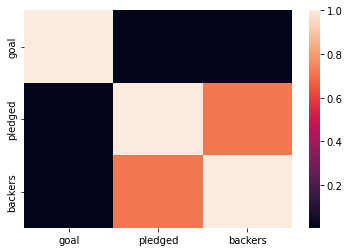

In [20]:
corr = df.corr()
sns.heatmap(corr);

Additonal features are kept for data exploration but will be dropped to prepare for machine learning. Displaying remaining features and info.

In [21]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   name           331462 non-null  object        
 1   category       331462 non-null  object        
 2   main_category  331462 non-null  object        
 3   deadline       331462 non-null  datetime64[ns]
 4   goal           331462 non-null  float64       
 5   launched       331462 non-null  datetime64[ns]
 6   pledged        331462 non-null  float64       
 7   state          331462 non-null  object        
 8   backers        331462 non-null  int64         
 9   country        331462 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 27.8+ MB


### Exploring the data

Creating pairplot to view/confirm data correlations. The columns 'backers' and 'pledged' appear to be correlated

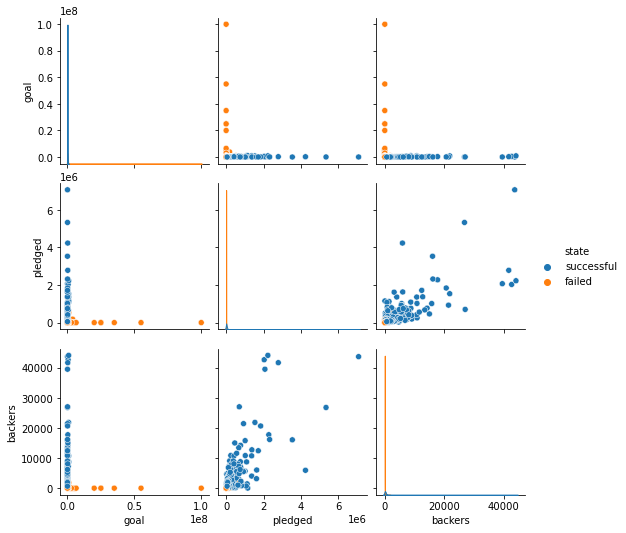

In [22]:
# Can be slow, creating a random sampling to speed up
df_mini = df.sample(n=25000)
sns.pairplot(df_mini, hue="state", height=2.5);

Creating a scatterplot of the amount pledged for each main category

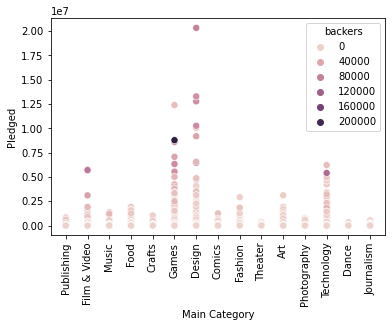

In [23]:
sns.scatterplot(x='main_category', y='pledged', hue='backers', data=df, s=50);
plt.xticks(rotation=90);
plt.xlabel('Main Category');
plt.ylabel('Pledged');

Creating a boxplot of amounts pledged by year

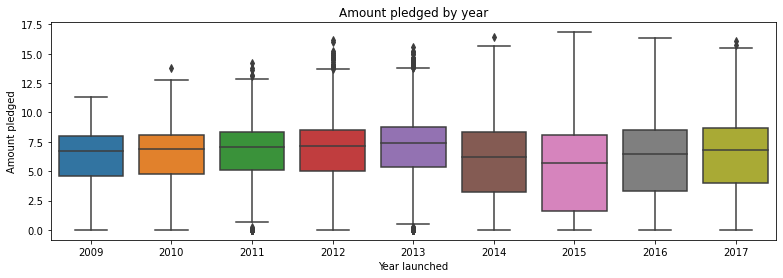

In [24]:
# Log tranform 'pledged' to distribute values
np.seterr(divide = 'ignore');
plt.figure(figsize=(13,4));
sns.boxplot(x=df.launched.dt.year, y=np.log(df.pledged));
plt.xlabel('Year launched');
plt.ylabel('Amount pledged');
plt.title('Amount pledged by year');
np.seterr(divide = 'ignore');

Creating barplot for number of campaigns by country

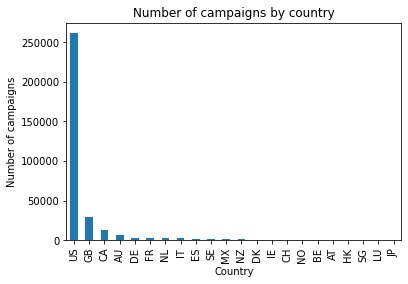

In [25]:
df['country'].value_counts()
df['country'].value_counts().plot.bar();
plt.xlabel('Country');
plt.ylabel('Number of campaigns');
plt.title('Number of campaigns by country');

Creating barplot for number of campaigns by main category

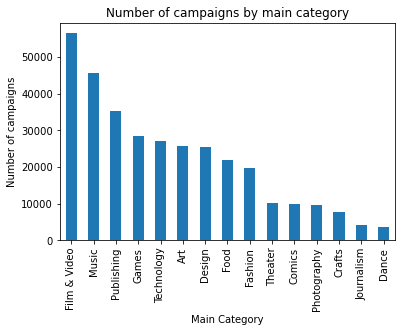

In [26]:
df['main_category'].value_counts().plot(kind='bar', title='Number of Campaigns by Main Category');
plt.xlabel('Main Category');
plt.ylabel('Number of campaigns');
plt.title('Number of campaigns by main category');

Creating barplot for mean dollars pledged by main category

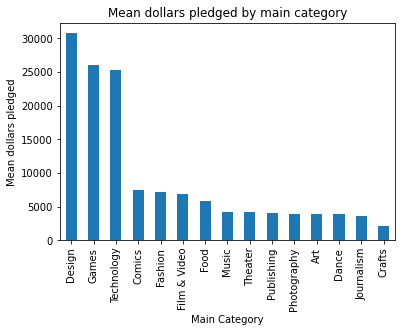

In [27]:
df.groupby('main_category').mean()['pledged'].sort_values(ascending=False).plot(kind='bar');
plt.xlabel('Main Category');
plt.ylabel('Mean dollars pledged');
plt.title('Mean dollars pledged by main category');

Creating barplot for number of backers by main category

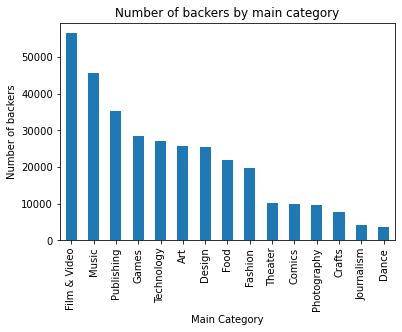

In [28]:
df.groupby('main_category')['backers'].count().sort_values(ascending=False).plot(kind='bar');
plt.xlabel('Main Category');
plt.ylabel('Number of backers');
plt.title('Number of backers by main category');

Display how many and list categories within main categories

In [29]:
df.groupby('main_category')['category'].value_counts()

main_category  category    
Art            Art             7486
               Painting        3034
               Illustration    2890
               Public Art      2850
               Mixed Media     2513
                               ... 
Theater        Festivals        512
               Experimental     342
               Immersive        297
               Spaces           194
               Comedy            92
Name: category, Length: 170, dtype: int64

Number of backers by sub category, under 50k backers for legibility

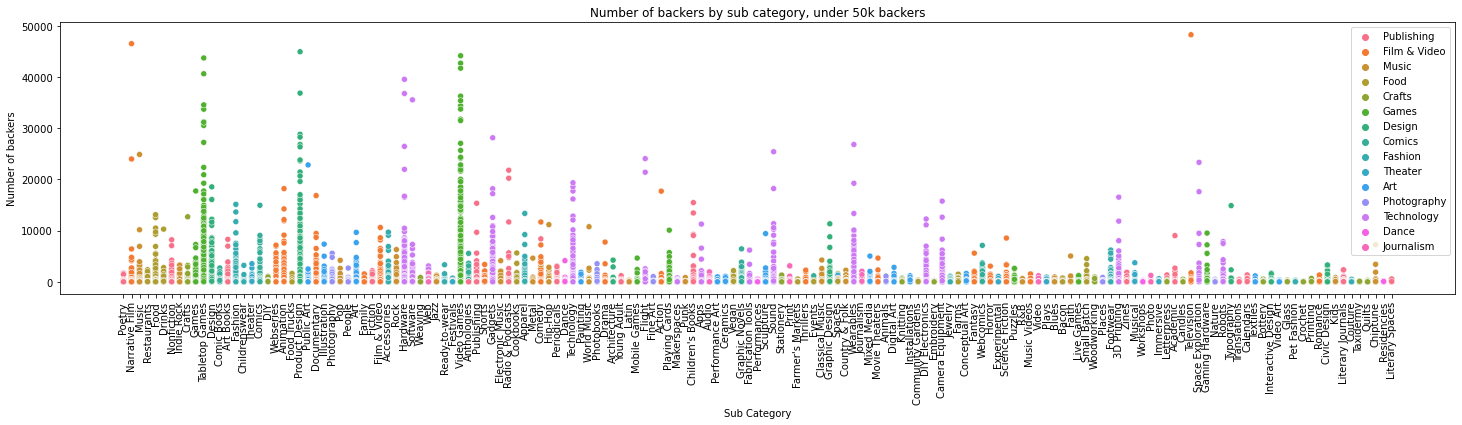

In [30]:
plt.figure(figsize=(25,5))
df2 = df[df['backers'] < 50000]
sns.scatterplot(x='category', y='backers', hue='main_category', data=df2);
plt.xlabel('Sub Category');
plt.xticks(rotation=90);
plt.ylabel('Number of backers');
plt.title('Number of backers by sub category, under 50k backers');
plt.legend(loc='best');

### Preparing data for machine learning

In [31]:
np.random.seed(28)

Converting categorical features to numeric. 
The best test RMSE was about 15% lower when converting the categorical columns manually to percentages versus using the get_dummies() method, with 6 predictors.

In [32]:
# Get campaign length in days
df['days'] = (df.deadline - df.launched).astype('timedelta64[D]').astype(int)


#Create numeric representation of 'main_category' by calulating mean percent of pledged amounts
def func(x):
    x['m_cat_perc'] = x['pledged'].mean() / x['pledged'].sum().sum()
    return x
df = df.groupby('main_category').apply(func)

# Create numeric representation of 'category' by calulating mean percent of pledged amounts
def func(x):
    x['s_cat_perc'] = x['pledged'].mean() / x['pledged'].sum().sum()
    return x
df = df.groupby('category').apply(func)

df['state'] = (df['state'] == 'successful').values.astype(int)


# predictors = ['goal', 'backers', 'days', 'category', 'main_category', 'state']
# target = 'pledged'
# X = df[predictors]
# X = pd.get_dummies(data=X, drop_first=True)

In [33]:
# select predictor and target variables to be used with regression model, dropping other features
predictors = ['goal', 'backers', 'days', 'm_cat_perc', 's_cat_perc', 'state']
#predictors = ['goal', 'backers', 'days', 'category', 'main_category', 'state', 'country']
target = 'pledged'
X = df[predictors].values
y = df[target].values


Getting a random sample of the data as knn can be slow

In [34]:
indexes = np.random.choice(y.size, size=15000)
X_mini = X[indexes]
y_mini = y[indexes]

# X_mini = X_mini[(np.abs(zscore(X_mini)) < 3).all()]
# y_mini = y_mini[(np.abs(zscore(y_mini)) < 3).all()]

Scaling the data

In [35]:
# Split into training and test sets and scale
scaler = StandardScaler()

# unscaled version, scaling is only used on predictor variables
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_mini, y_mini, test_size=0.25, random_state=1)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

#X_train = X_train[(X_train < 3) | (X_train > -3)]
#X_test = X_test[(X_test < 3) | (X_test > -3)]

Data sanity check

In [36]:
print(X_train.shape)
print(X_train[:3])

(11250, 6)
[[-0.0559271  -0.17370337 -0.30750036 -0.41657818 -0.25264235 -0.81785809]
 [-0.01585716 -0.1703651   2.03424273 -0.15026109 -0.37779915 -0.81785809]
 [-0.05609406 -0.14032067 -0.30750036 -0.56901524 -0.2625667   1.22270601]]


### Baseline performance

Getting the baseline "blind" prediction, average value of the target variable

In [37]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [38]:
actual = y_test
predicted = y_train.mean()

print("test, rmse baseline: " + str(round(rmse(predicted, y_test),1)))

test, rmse baseline: 66072.9


###  KNeighborsRegressor - Performance with default hyperparameters

In [39]:
knn = KNeighborsRegressor(algorithm='brute')
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

print("test RMSE, defualt hyperparameters: " + str(round(rmse(predicted, y_test),1)))

test RMSE, defualt hyperparameters: 52169.5


### Testing with different values of K

In [40]:
def get_train_test_rmse(knn, X_train, X_test, y_train, y_test):
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    train = rmse(y_train, knn.predict(X_train))
    test = rmse(y_test, predictions)
    return(train, test)

In [41]:
n = 30
test_rmse = []
train_rmse = []
ks = np.arange(1, n+1, 2)
for k in ks:
    print(k, ' ', end='')
    knn = KNeighborsRegressor(n_neighbors=k)
    rmse_tr, rmse_te = get_train_test_rmse(knn, X_train, X_test, y_train, y_test)
    train_rmse.append(rmse_tr)
    test_rmse.append(rmse_te)
print('done')

1  3  5  7  9  11  13  15  17  19  21  23  25  27  29  done


Print test RMSE results as a function of k, for all odd value k up to 29

In [42]:
print(test_rmse)

[81997.89121360613, 62029.24584675199, 52169.54031329579, 44517.03310098852, 44812.34500545312, 42485.43682704381, 42003.24968350373, 41291.69995824102, 42180.32383806887, 43331.88123336618, 42677.29482436208, 43791.71227635761, 43700.95751088592, 43385.6035475931, 42837.385333659724]


Print the best k and the test RMSE associated with it

In [43]:
def get_best(ks, rmse):
    best = rmse[0]
    bestk = ks[0]
    for i in range(0, len(ks)):
        if (rmse[i] < best):
            best = rmse[i]
            bestk = ks[i]
        #print(i)  
        #print(rmse[i])     
    return int(bestk), round(best,1)  

best_k, best_rmse = get_best(ks, test_rmse)
print('best k = {}, best test RMSE: {:0.1f}'.format(best_k, best_rmse))

best k = 15, best test RMSE: 41291.7


Plot the test and training RMSE as a function of k, for all odd value k up to 29

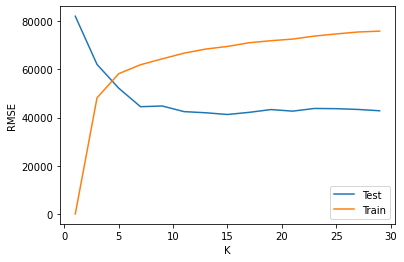

In [44]:
plt.plot(ks, test_rmse);
plt.plot(ks, train_rmse);
plt.legend(['Test', 'Train']);
plt.xlabel('K');
plt.ylabel('RMSE');

The best RMSE while testing hyperparmeter values of k on the KNeighborsRegressor model was 41291.7

### LinearRegressor model

In [45]:
# select predictor and target variables to be used with model, dropping other features
predictors = ['goal', 'backers', 'days', 'm_cat_perc', 's_cat_perc', 'state']
target = 'pledged'

X = df[predictors].values
y = df[target].values

reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg.fit(X,y)

LinearRegression()

View the coefficients and intercept of the LinearRegression model  

In [46]:
print(reg.intercept_)
print(reg.coef_)
# print('intercept: ' + str(round(reg.intercept_, 2)))
# print('coefficients:')

-2396.2822501874325
[ 4.31160035e-04  7.52031247e+01  8.28152528e+01 -1.10918978e+07
  4.57663281e+05  4.34176191e+03]


Plotting the actual values versus the predicted values

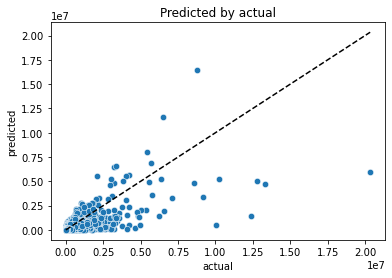

In [47]:
def plot_actual_predicted(actual, predicted, title):
    sns.scatterplot(x=actual[:], y=predicted[:], s=40)
    
    x = predicted[:].min(), actual[:].max()
    y = predicted[:].min(), actual[:].max()

    plt.plot(x, y, color='black', linestyle='dashed');
    plt.title(title);
    plt.xlabel('actual');
    plt.ylabel('predicted');
    
plot_actual_predicted(y, reg.predict(X), 'Predicted by actual')

Many predictions are off the line. Fitting another model after splitting into training and test data.

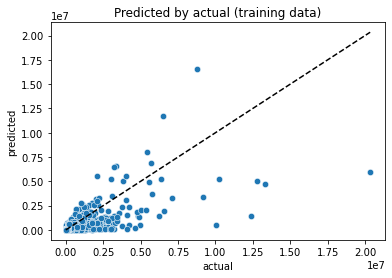

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
reg2 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg2.fit(X_train, y_train)
plot_actual_predicted(y_train, reg2.predict(X_train), 'Predicted by actual (training data)')

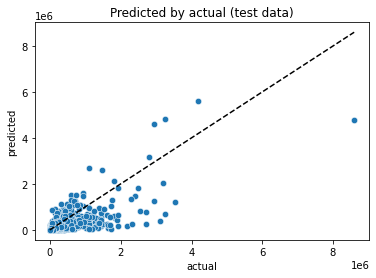

In [49]:
plot_actual_predicted(y_test, reg2.predict(X_test), 'Predicted by actual (test data)')

The plots of test and training data appear similiar, checking RMSE and r-squared values

In [50]:
RMSE = np.sqrt(((reg2.predict(X_test) - y_test)**2).mean())
print(round(RMSE, 2))
print('r-squared value of reg2: {:.4f}'.format(reg2.score(X_train,y_train)))

47526.27
r-squared value of reg2: 0.5069


The new model increases the RMSE by about 15%. 

In [51]:
predictors = ['goal', 'backers', 'days', 'm_cat_perc', 's_cat_perc', 'state']

X = np.array(df[predictors])
X_s = zscore(X)
y = df['pledged']

Let's check the r-squared value of the scaled data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.25, random_state=1)

reg3 = LinearRegression()
reg3.fit(X_train, y_train)

print('r-squared value of reg3: {:.4f}'.format(reg3.score(X_train,y_train)))

r-squared value of reg3: 0.5069


Scaling the data has not affected the results, let's try adding some Polynomial Features

In [53]:
pf = PolynomialFeatures(degree=2)
pf.fit(X)
X_poly = pf.transform(X)

Checking the shape

In [54]:
X_poly.shape

(331462, 28)

Creating a model using all of the new features

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=1)

reg4 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg4.fit(X_train, y_train)

predict = reg4.predict(X_test)
RMSE = np.sqrt(((predict - y_test)**2).mean())
print('RMSE: ' + str(round(RMSE, 2)))

RMSE: 46128.66


Check the RMSE of the first feature

In [56]:
X_0 = X_train[:,[0]]

# compute the negated mse scores with 5-fold cross validation
scores = cross_val_score(LinearRegression(), X_0, y_train, scoring='neg_mean_squared_error', cv=5)
RMSE = np.sqrt(-scores.mean())

print('RMSE: ' + str(round(RMSE, 2)))

RMSE: 109325.81


Find feature with the lowest RMSE

In [57]:
rmse_min = []

for i in range(X_train.shape[1]):
    X_0 = X_train[:,[i]]
    scores = cross_val_score(LinearRegression(), X_0, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_min.append(np.sqrt(-scores.mean()))
i_min = np.where(rmse_min == np.min(rmse_min))[0][0]

rmse_min = np.min(rmse_min)
print('best feature: {}, best RMSE: {:.2f}'.format(pf.get_feature_names()[i_min], rmse_min))

best feature: x1, best RMSE: 78607.68


Now let's find the best set of 8 features using the greedy method of forward feature selection.

In [58]:
remaining = list(range(X_train.shape[1]))
selected = []

n = 8
while len(selected) < n:
    rmse_min = 1e7
    for i in remaining:
        selected.append(i)
        X = X_train[:,selected]
        scores = cross_val_score(LinearRegression(), X, y_train, scoring='neg_mean_squared_error', cv=5)
        selected.remove(i)      
        if (np.sqrt(-scores.mean()) < rmse_min):
            rmse_min = np.sqrt(-scores.mean())
            i_min = i        
    remaining.remove(i_min)
    selected.append(i_min)  
    print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))

num features: 1; rmse: 78607.68
num features: 2; rmse: 74663.02
num features: 3; rmse: 72597.77
num features: 4; rmse: 72419.93
num features: 5; rmse: 72317.89
num features: 6; rmse: 72211.72
num features: 7; rmse: 72205.64
num features: 8; rmse: 72204.96


Shows little improvement after 7 features. Check RMSE of 8 feature set

In [59]:
X = X_poly[:,selected]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

reg7 = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg7.fit(X_train, y_train)

predict = reg7.predict(X_test)
RMSE = np.sqrt(((predict - y_test)**2).mean())
print('test RMSE with 8 features: ' + str(round(RMSE, 2)))

test RMSE with 8 features: 46397.6


Our model using all features has only slightly better RMSE value than the 8 feature set

### DecisionTreeRegressor model

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

reg8 = DecisionTreeRegressor(max_depth=5)
reg8.fit(X_train, y_train)

y_predict = reg8.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt((errors**2).mean())
print('rmse: {:0.2f}'.format(rmse))

rmse: 44574.83


### Conclusion

The best RMSE while testing hyperparmeter values of k on the KNeighborsRegressor model was 41291.7 with a k value of 15.
The best RMSE while testing the LinearRegressor model was 46128.66 using all polynomial features and 46397.6 using the top 8 features. The best RMSE while testing max depth values of the DecisionTreeRegressor model was 44574.83 with a max depth of 5.